# Predicting heart disease using machine learning

* [1. Problem definition](#def)
* [Data description](#desc)
* [Preparing tools](#pre_tools)
* [Importing and cleaning Data](#import_clean)
* [Evaluation](#eval)
* [Features](#feat)
* [Modeling](#model)


<a class="anchor" id="desc"></a>
# Data description
    
   **Data dictionary** 
1. **age** in years
2. **sex:**
    * 1 = male
    * 0 = female
3. **cp** chest pain type:
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
    * 4: asymptomatic
4. **trestbps** resting blood pressure (in mm Hg on admission to the hospital)
5. **chol** serum cholestoral in mg/dl
6. **fbs** (fasting blood sugar > 120 mg/dl):
    * 1 = true
    * 0 = false
7. **restecg** resting electrocardiographic results:
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. **thalach** maximum heart rate achieved
9. **exang** exercise induced angina:
    * 1 = yes
    * 0 = no
10. **oldpeak** ST depression induced by exercise relative to rest
11. **slope** the slope of the peak exercise ST segment:
    * 1: upsloping
    * 2: flat
    * 3: downsloping 
12. **ca** number of major vessels (0-3) colored by flourosopy
13. **thal:** 
    * 3 = normal 
    * 6 = fixed defect
    * 7 = reversable defect
14. **target:**
    * 1 = true
    * 0 = false

<a class="anchor" id="pre_tools"></a>
# Preparing tools
We will prepare on necessary libraries:
* **Pandas** - data/dataset manipulation
* **Numpy** - scientific computing
* **Seaborn** - plotting
* **Sklearn** - machine learning

In [123]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to apper inside notebook
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, r2_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

<a class='anchor' id='import_clean'></a>
# Import, analysis data, and clean data

In [124]:
df = pd.read_csv("data/heart-disease.csv")

In [125]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age vs. Maximum heart rate achieved

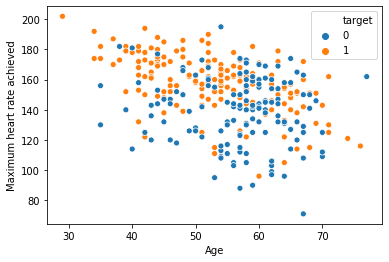

In [126]:
sns.scatterplot(x=df['age'], y=df['thalach'], hue=df['target'])
plt.xlabel('Age')
plt.ylabel('Maximum heart rate achieved')
plt.legend()

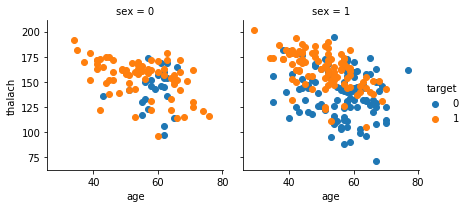

In [127]:

g = sns.FacetGrid(df, col='sex', hue='target')

g.map(plt.scatter, 'age', 'thalach')
g.add_legend()


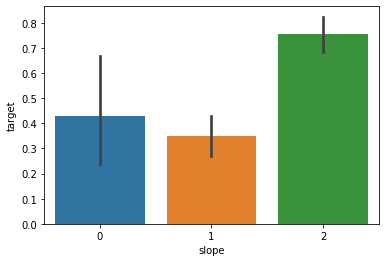

In [140]:
sns.barplot(x='slope', y='target', data=df);


## Distribution of age

In [ ]:
sns.distplot(df['age'])

## Correlation Matrix

In [138]:
# Make a correlation matrix from DataFrame
corr_matrix = df.corr()

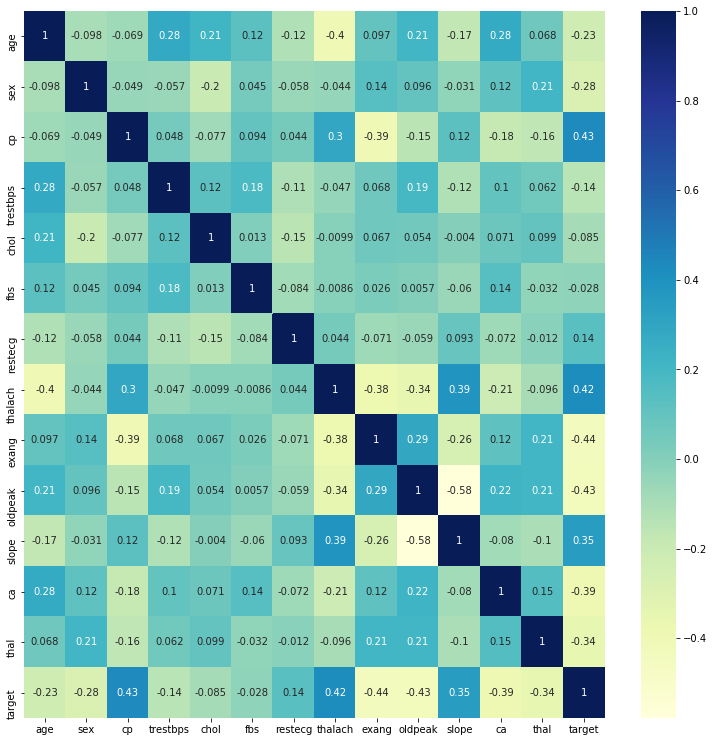

In [139]:
# Plot correlation matrix using seaborn heatmap 
plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)

<a class='anchor' id='model'></a>
# Modeling

We need to prepare data to fit it into models. Size of test data will we 20% of main data set. 
<br>
Model we will be using are:
* **Logistic Regression**
* **KNeighbors Classifier**
* **Random Forset Classifier**

At the end of modeling we will try to tune hyper parameters of best model, using RandomSearchCV and GridSearchCV.


In [ ]:
X = df.drop(axis=1,columns='target')
y = df['target']

In [ ]:
# split into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

def eval_models(models, X_train, X_test, y_train, y_test):
    """
    eval models, need to complete doc
    """
    np.random.seed(42)
    
    models_score = {}
    
    # name - name of model, key of dictionary
    # model - name of model function, index of dictionary
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        models_score[name] = model.score(X_test, y_test)
        
    return models_score
        

In [ ]:
models_score = eval_models(models, X_train, X_test, y_train, y_test)

In [ ]:
models_score_df = pd.DataFrame(models_score, index=['acc'])
models_score_df.T.plot.bar()